# Euler


test python against C++

In [1]:
import os

#go to python to load the RK solver
os.chdir('../../../python/Euler/')

In [2]:
from Solver.Euler import Euler

In [3]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=10
plt.rcParams['mathtext.fontset']='stixsans'

In [4]:
class diff_eq:
    def __init__(self,n=1):
        self.n_eqs=n
        
                   
    def __call__(self,y,t):
        return [-20*y[0]*t**3,
                5*y[0]*t**2+2*(-y[1]**2+y[2]**2)*t,  
                15*y[0]*t**2+2*(y[1]**2-y[2]**2)*t ]

    
dydt=diff_eq(3)

in0=[5,10,0]
sol=Euler(dydt,in0,N=5000)


In [5]:
sol.solve()

In [6]:
#return to C++/Euler, to get the C++ output
os.chdir('../../C++/Euler')

In [7]:
%%sh
g++ Euler.cpp -I ./

./a.out;

In [8]:
#load the results from C++
os.chdir('test/')

tpp= np.loadtxt('t.dat')
y1pp=np.loadtxt('y1.dat')
y2pp=np.loadtxt('y2.dat')
y3pp=np.loadtxt('y3.dat')

<IPython.core.display.Javascript object>


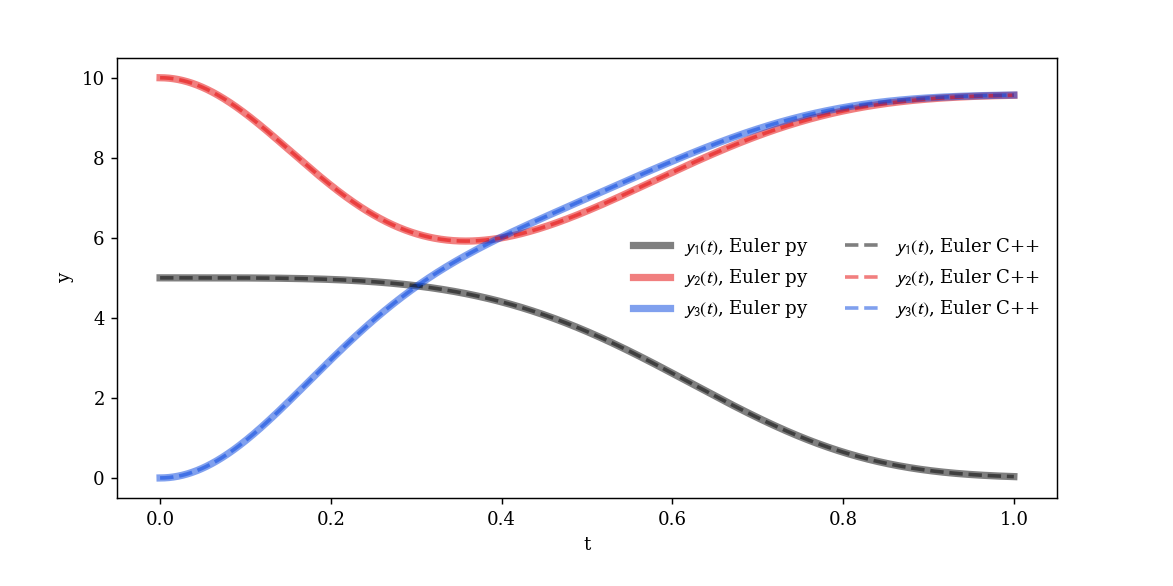

In [9]:
fig=plt.figure(figsize=(9,4.5))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(111)
for i in range(len(sol.solution)):
    sub.plot(sol.steps,sol.solution[i],c=_c[i],alpha=0.5,linestyle='-',linewidth=4,label=r'$y_{'+str(i+1)+'}(t)$, Euler py')

sub.plot(tpp,y1pp,c=_c[0],alpha=0.5,linestyle='--',linewidth=2,label=r'$y_{1}(t)$, Euler C++')
sub.plot(tpp,y2pp,c=_c[1],alpha=0.5,linestyle='--',linewidth=2,label=r'$y_{2}(t)$, Euler C++')
sub.plot(tpp,y3pp,c=_c[2],alpha=0.5,linestyle='--',linewidth=2,label=r'$y_{3}(t)$, Euler C++')

    

sub.set_ylabel('y')      
sub.set_xlabel('t')  
sub.legend(framealpha=0,ncol=2,loc='center right',bbox_to_anchor=(1,0.5))

plt.show()